In [2]:
from IPython.core.display import HTML
from IPython.lib.display import YouTubeVideo
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Data visualization

Visualizing your data is a **key** component of data analysis, no matter how big or small your data is.  Our minds are hardwired to process visual information, in fact **one-third** of our brain is dedicated to image processing and **40% of all** nerve fibers connected to the brain come from the retina. Visualization is essentially a high-speed link to your cognitive systems.

Let me show you a quick example.

## Traffic accidents

Let's look at this image together, it plots the number of accidents per month against the time of day. Then tell me when accidents are likely to occur?

<img src='../images/visualization_raw_chart.png'></img>

Now let's try something different. This is the same chart, but now I've added a color scale. The individual numbers have a deeper shade of blue the more accidents that occur during that time period.

Now tell me, when are accidents most likely to occur? How long did it take you to figure it out?

<img src = '../images/visualization_heatmap.png'></img>

# Effective visualizations make a difference

Effective visualizations allow us to make accurate decisions quicker. More importantly they help us make **correct** decisions. When you make a visualization, you're actually trying to make a point. The entire point is to persuade your audience of some fact that you know to be true. 

Whether you accept this statement or not, it is what happens. If you don't construct your visualization in a way that informs your audience and allows them to make a correct decision they can easily reach a different conclusion. 

# Creating a poor visualization can be disastrous

Literally, disastrous. 

Does everyone remember the 1986 Challenger shuttle launch? The Challenger was a NASA Space Shuttle that exploded upon take-off because the O-rings in the rockets cracked and allowed jet fuel to leak into the combustion chamber.

In [3]:
#Fast-forward to 7:10
YouTubeVideo('lQMuRbCaZ7E?t=7m10s')

## Why did the O-rings crack?

There were rumblings at NASA prior to the Challenger launch that defects in the O-rings occurred at cold temperatures. This data was looked at by a large number of people, but this is how it was presented to senior management (the people actually tasked with making the decision of **whether it was safe or not** to launch the rocket).

### When Challenger was launched the predicted temperature was 27 F.
### Would you have not launched the shuttle based on this graph?

<img src = '../images/challenger_original.png'></img>

Here is that graph remade.

### Now would you have not launched the shuttle?

<img src='../images/challenger_remade.png'></img>

# In NO way does this mean that you should lie with a graph

Yes, your purpose is persuade. But that doesn't mean that you should be like Fox News

<img src = '../images/fox_news.png'></img>

Or any other major cable news network for that matter (they are all awful). The real start of a final graph is identifying the key point that you want to communicate and then figuring out what is the best way to communicate that.

**Making a good graph is just like writing a good essay in that regard** (and here you thought that we would never invoke English composition in a programming class). 

From here on we will focus on the actual nuts and bolts of crafting a graph in Python, but you should keep these principles in mind. If you are interested more on the concepts and best practices of visualization you should read the books by [Edward Tufte](http://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=edward+tufte&rh=i%3Aaps%2Ck%3Aedward+tufte), he is considered to be one of the leading experts in this field. If you are looking for practical ways to create interactive visualizations on the web, it is my personal belief that you should look at the works of [Mike Bostock](http://bost.ocks.org/mike/) and [Scott Murray](http://alignedleft.com) that use [D3](http://d3js.org).

# Plotting in Python

A number of plotting packages have emerged for Python in the last 3 years. However, the largest, most complete package is `matplotlib`. `Matplotlib` was created in 2003 and is the oldest Python plotting library that has survived.

However, that doesn't mean that it's always the best. If you are a biologist there is the `seaborn` library and if you don't care about your data being public there is a new service called `plot.ly` with a Python library.

In any case, `matplotlib` covers the majority of situations to create graphs that users in the class will need. There are also the most stackoverflow answers for the library (which are honestly the actual documentation for it. Don't ever bother going to the actual matplotlib web page for a question), which help new users utilize its features. For these reasons we will cover it in the class.

## Matplotlib has every option you need
### And in most cases too many options

If you go poking around on-line you'll read about how `matplotlib` has both a `matlab` style plotting interface to convert engineers and an `object-oriented` interface. **Ignore all of that noise**. What it really means is that we can plot a graph very quickly with `matplotlib`. Let me show you.

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

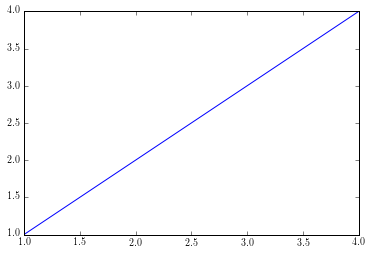

In [6]:
plt.plot([1, 2, 3, 4], [1, 2, 3, 4])

**There! That's a plot.**

This is that simple, instructive interface that they talk about online when they mention a `matlab` like interface.

However, creating a plot like this limits our ability to modify it. In our examples we will use the more `object-oriented` interface. It may seem like it has a lot of cruft, but it greatly expands our power in tweaking the visualization.

To create a graph this way we first create a `figure`

In [7]:
fig = plt.figure()

We can actually pass arguments to the figure, like changing its size.

In [8]:
fig = plt.figure(figsize = (10, 7))

Those dimensions are actually in inches, the first one is the width and the other is the height.

Now we have to create something to plot, that something is a set of `axes` inside a `subplot`. `subplot`s let us have multiple graphs inside a single plot. I'll show you it first though.

In [9]:
ax = fig.add_subplot(1, 1, 1)

And then plot it (I'm putting all of the commands together here)

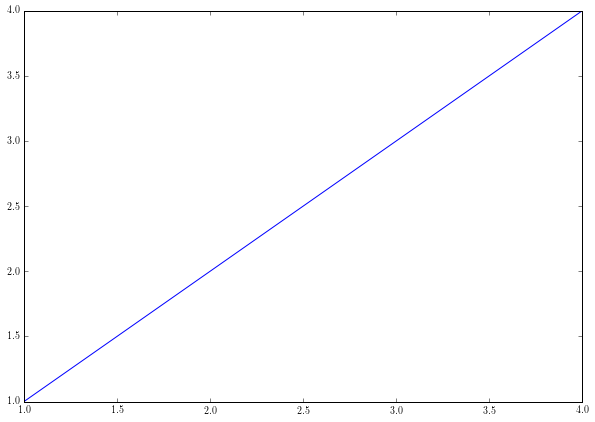

In [10]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot([1, 2, 3, 4], [1, 2, 3, 4])

When we specify subplots the first number is the number of rows of plots. The second number is the number of columns of plots. The third number is the specific plot that you wish to populate. This number goes from 1 to the maximum plot number (num_columns * num_rows). Hopefully this image will make it more clear

<img src='../images/matplotlib_subplots.png'></img>

And now let me demonstrate it

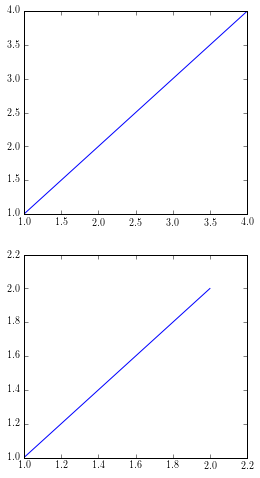

In [11]:
data = [1, 2, 3, 4]
#STart the figure
fig = plt.figure(figsize = (4, 8))
#Create the first axis
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(data, data)
#Create the second axis
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(data[:2], data[:2])

Now let's just import a host of libraries that we will use throughout this exercise.

In [12]:
import sys
import numpy as np
import random as rand 
import matplotlib as mpl
import matplotlib.cm as cm

And here I will create some fake data that I will use throughout to show some basic plots

In [13]:
x = range(5,100,5)
y = [i**2 for i in x]
z = [100*i for i in x]
rv1 = [rand.random() for i in range(1000)]
rv2 = [rand.random() for i in range(10000)]

Now plot the `x` and `y` data as a simple graph like I've already shown you.

In [14]:
#Here, let me create the figure for you
fig = plt.figure( figsize = (6, 4) )



An import part of graphing is labelling axes and providing legends?  IT's actually pretty simple. 

Let's add a little bit to our simple graph.

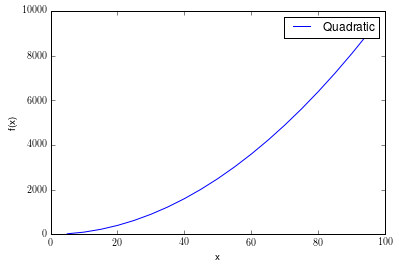

In [15]:
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic")
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
# Display legend
ax.legend()

#### Ok, that's the basics. But how do we make it visually appealing?

For that we'll need to start playing with the options. Let's start by changing the font size for the labels and the color of the plot.

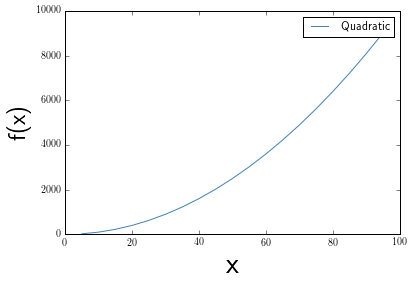

In [17]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue')
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("x", fontsize = 2*font_size)
ax.set_ylabel("f(x)", fontsize = 1.6*font_size)
# Display legend
ax.legend()

Or rather simply use LaTeX (if you know what it is) to write text.

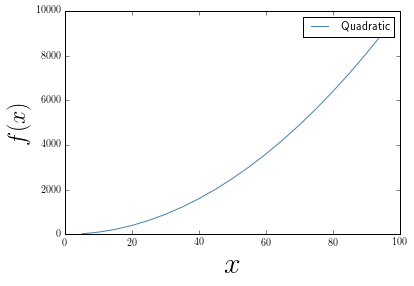

In [18]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue')
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size)
# Display legend
ax.legend()

And we should really move the legend box, it's blocking the line! And get rid of that silly legend box.

Let's make the line **wider** too.

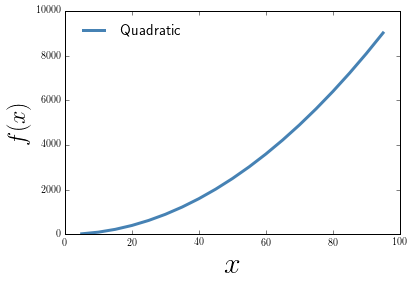

In [20]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue', linewidth = 3)
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size)
# Display legend
ax.legend(loc='best', frameon=False, fontsize = font_size)

If this was real data, we would maybe want to show the individual datapoints too. To put points on the line we need to add a marker. 

Matplotlib has a number of different marker styles, but I'll just use a circle since that is the most common.

We should also add some text, let says that this is `Figure (A)` of a multi-part figure. We'll add `(A)` to teh plot.

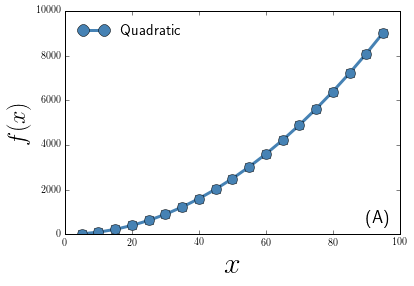

In [21]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue', linewidth = 3, marker = 'o', markersize = 10)
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size)
# Display legend
ax.legend(loc='best', frameon=False, fontsize = font_size, markerscale = 1.2)
#Adding a label
ax.text(90, 500, "(A)", fontsize = 1.2 * font_size)

For a plot like this, we might also not want to have the full frame around the plot. We can remove that by changing the spines

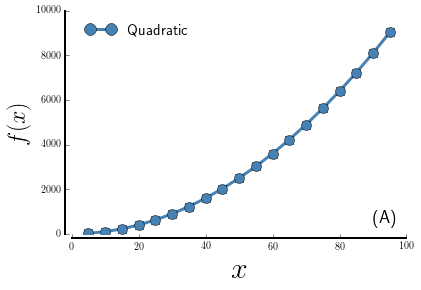

In [23]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue', linewidth = 3, marker = 'o', markersize = 10)
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size)
# Display legend
ax.legend(loc='best', frameon=False, fontsize = font_size, markerscale = 1.2)
#Adding a label
ax.text(90, 500, "(A)", fontsize = 1.2 * font_size)
#Turn off the spines
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_position(("axes", -0.02))
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
#We'll also need to turn off the ticks on the axes that we turned off
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

But you know what's really bugging me now? The y-axis covers a great range, so much that it should be a log instead of linear scale

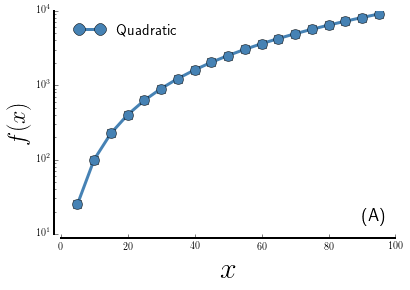

In [24]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue', linewidth = 3, marker = 'o', markersize = 10)
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size)
# Display legend
ax.legend(loc='best', frameon=False, fontsize = font_size, markerscale = 1.2)
#Adding a label
ax.text(90, 15, "(A)", fontsize = 1.2 * font_size)
#Turn off the spines
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_position(("axes", -0.02))
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
#We'll also need to turn off the ticks on the axes that we turned off
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#Change the y-scale to log
ax.set_yscale('log')

And of course we can save the figure. To do that we use the `plt` command and just say `savefig()`. The file extension that we give in the filename determines the type of image file. You can choose to save the image as a `jpg`, `png`, `eps`, or `pdf`.

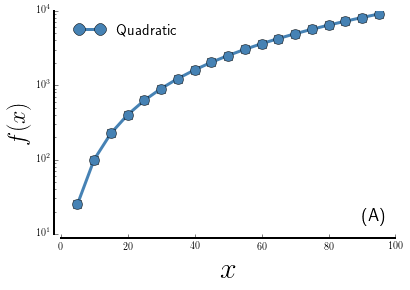

In [25]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue', linewidth = 3, marker = 'o', markersize = 10)
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size)
# Display legend
ax.legend(loc='best', frameon=False, fontsize = font_size, markerscale = 1.2)
#Adding a label
ax.text(90, 15, "(A)", fontsize = 1.2 * font_size)
#Turn off the spines
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_position(("axes", -0.02))
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
#We'll also need to turn off the ticks on the axes that we turned off
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#Change the y-scale to log
ax.set_yscale('log')
#Save the figure
plt.savefig('quadratic_logscale_half_frame.png')

You see now that the number of options that you can possibly configure to make a graph look like **how you want** is **huge!**. There's way too much to go over in this lecture right now and have you retain it, so we're going to stop going over more and more options now. If you want to learn more about the intricacies of `matplotlib` I think that this is a good [tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/).

## Sometimes you just want a decent looking graph quickly though

I personally can't handle how the basic `matplotlib` graphs look like, even when I just am quickly exploring data. The way that I get around that is by using a relatively new addition to `matplotlib`, `styles`. There are a few (but should be more soon) pre-canned styles that look pretty okay. These are by no means *perfect publishable* figures, but they look decent enough to show a colleague quickly.

You can actually change the default style in the entire notebook if you execute

    plt.style.use('style_name')
    
But I don't want to change the style of every plot in the notebook. When you don't want to change the style globally, you can just write a graph like this:

    with plt.style.context('style_name'):
        #Your graph code here
        
That `with` statement basically says that all of the code inside that block should use that setting. Once we leave the `with` block the `with` statement is no longer applied.

If you've used `R` then you probably know about `ggplot`, you can replicate its style like so:

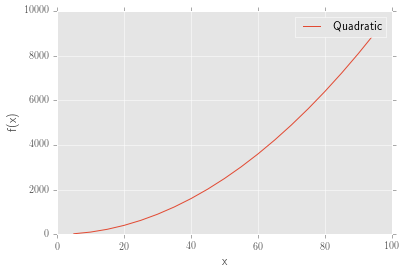

In [26]:
with plt.style.context('ggplot'):
    fig = plt.figure( figsize = (6, 4) )
    ax = fig.add_subplot(1,1,1)
    # We should add a label to our dataset that will go into a legend
    ax.plot(x, y, label = "Quadratic")
    # Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    # Display legend
    ax.legend()

And if you're really into Nate Silver's work you can try a style similar to the one used at [fivethirtyeight](fivethirtyeight.com).

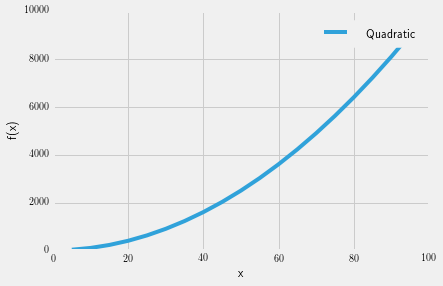

In [27]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure( figsize = (6, 4) )
    ax = fig.add_subplot(1,1,1)
    # We should add a label to our dataset that will go into a legend
    ax.plot(x, y, label = "Quadratic")
    # Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    # Display legend
    ax.legend()

But my personal favorite is a a style called `bmh` that's about halfway between the two previous styles

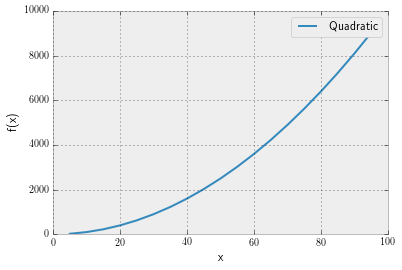

In [28]:
with plt.style.context('bmh'):
    fig = plt.figure( figsize = (6, 4) )
    ax = fig.add_subplot(1,1,1)
    # We should add a label to our dataset that will go into a legend
    ax.plot(x, y, label = "Quadratic")
    # Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    # Display legend
    ax.legend()

Also, something to be aware of is that grey backgrounds typically don't print out very well unless you have a nice color printer!
So typically we'll need to change the axis background color to white before we print. We can do that when we create the axes.

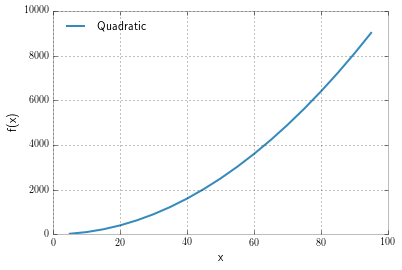

In [29]:
with plt.style.context('bmh'):
    fig = plt.figure( figsize = (6, 4) )
    ax = fig.add_subplot(1,1,1, axisbg = 'white')
    # We should add a label to our dataset that will go into a legend
    ax.plot(x, y, label = "Quadratic")
    # Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    # Display legend
    ax.legend(loc = 'best', frameon=False)

# Now for all of these other plot types

There is far more than just a line plot in matplotlib. We can make a `scatter`, `bar`, `histogram`, `heatmaps`, `box plots`, and `violin plots`. 

You can see some simple examples of all of these types at the Matplotlib lib [page](http://matplotlib.org/gallery.html).

One of the most used types of plots is a [histogram](https://en.wikipedia.org/wiki/Histogram). This is the type of plot you use when you want to examine the distribution of a dataset.

When would you want to look at a distribution? Well what about when you have a bunch of GPAs for the class students. It turns out that we have that GPA data!

In [30]:
def read_gpa_data(filepath):
    '''
    Reads in the gpa data file of undergraduate students
    input:
        filepath - str, filename
    output:
        gpas - list, float gpas
    '''
    data = [l.strip().split(',') for l in open(filepath).readlines()]
    gpas = []
    for gpa_line in data:
        try:
            fgpa = float(gpa_line[0])
            if fgpa < 4.0:
                gpas.append(fgpa)
        except:
            pass
    return gpas
        
gpas = read_gpa_data('../Data/gpa_data.csv')
gpas[:10]

[3.27, 3.966, 3.25, 3.44, 3.62, 3.7, 3.7, 3.964, 3.46, 3.754]

So now it doesn't make any sense at all to look at this as a line, we'll want to see how the GPA of our incoming freshman class is distributed. For that we use a histogram.

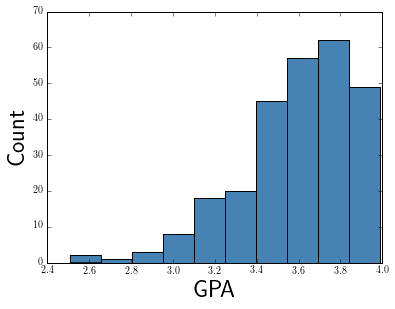

In [31]:
fig = plt.figure( figsize = (6, 4.5))
ax = fig.add_subplot(1, 1, 1)
ax.hist(gpas, color = 'steelblue')
ax.set_xlabel('GPA', fontsize = 1.6 * font_size)
ax.set_ylabel('Count', fontsize = 1.6 * font_size)

You just hand the numeric data directly to `matplotlib` and it will figure out how to bin it for you! That isn't always correct for your problem though, sometimes you'll need to change the number of bins and you can do that giving a different value to the `bins` keyword.

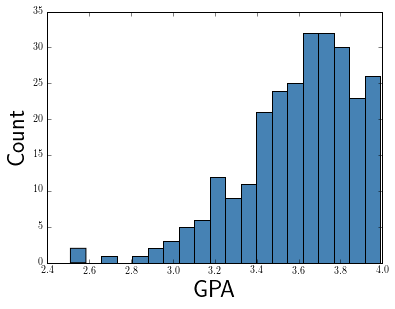

In [32]:
fig = plt.figure( figsize = (6, 4.5))
ax = fig.add_subplot(1, 1, 1)
ax.hist(gpas, bins = 20, color = 'steelblue')
ax.set_xlabel('GPA', fontsize = 1.6 * font_size)
ax.set_ylabel('Count', fontsize = 1.6 * font_size)

You can also give it a custom list of bin sizes that you want it to use also.

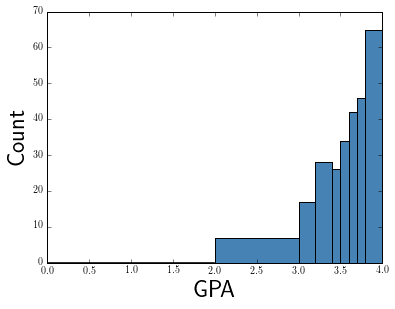

In [33]:
fig = plt.figure( figsize = (6, 4.5))
ax = fig.add_subplot(1, 1, 1)
ax.hist(gpas, bins = [0, 2, 3, 3.2, 3.4, 3.5, 3.6, 3.7, 3.8, 4], color = 'steelblue')
ax.set_xlabel('GPA', fontsize = 1.6 * font_size)
ax.set_ylabel('Count', fontsize = 1.6 * font_size)

You've noticed that what we've shown is just the count though. Many times people will want to look at the `probability distribution function (pdf)` or `probability mass function (pmf)`. When you plot the `pdf` or `pmf` it allows you to actually calculate the probability that a certain value on your x-axis will occur based on the graph. To make one of these plots we just need to give the `normed` parameter a `True` value when we create the histogram.

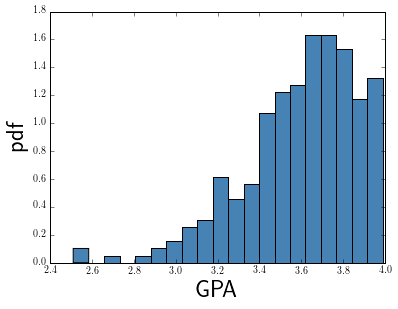

In [34]:
fig = plt.figure( figsize = (6, 4.5))
ax = fig.add_subplot(1, 1, 1)
ax.hist(gpas, bins = 20, normed = True, color = 'steelblue')
ax.set_xlabel('GPA', fontsize = 1.6 * font_size)
ax.set_ylabel('pdf', fontsize = 1.6 * font_size)

# Bar charts
Let's say that you had some data about the different spending habits of men and women at different locations.

In [35]:
locations = ['bar', 'shoe store', 'grocery store', 'yoga', 'gym']
men_spending = [100, 5, 80, 5, 60]
women_spending = [10, 100, 75, 55, 10]

And you wanted to create a bar chart to show the difference between these two groups. We can do that!

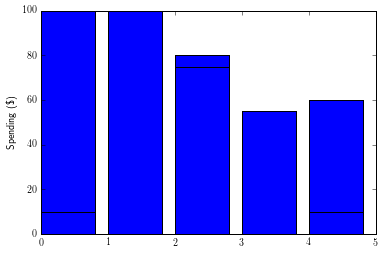

In [36]:
fig = plt.figure( figsize = (6, 4))
ax = plt.subplot(1, 1, 1)
#For a bar chart we need to create a dummy set of x-data.
#It's easiest to just use the `range()` function on the number of groups
num_categories = len(locations)
x_positions = range(num_categories)
#Now we can add the men
ax.bar(x_positions, men_spending, label='Men')
#Then the women
ax.bar(x_positions, women_spending, label='Women')
#Label it
ax.set_ylabel('Spending (\$)')

**Woops!** The bars are right on top of each other!

You'll need to **offset** each of the bars. If you set the **width** of the bars to the **offset** also, you know that the bars won't overlap.

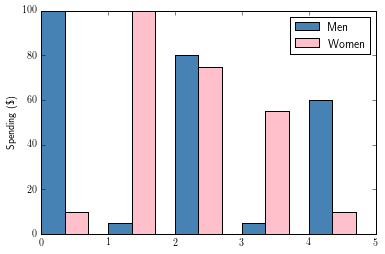

In [37]:
fig = plt.figure( figsize = (6, 4))
ax = plt.subplot(1, 1, 1)

#For a bar chart we need to create a dummy set of x-data.
#It's easiest to just use the `range()` function on the number of groups
num_categories = len(locations)
x_positions = range(num_categories)
offset = 0.35

#Now we can add the men
ax.bar(x_positions, men_spending, offset, label='Men', color='steelblue')
#Then the women
ax.bar([x_pos + offset for x_pos in x_positions], women_spending, offset, label='Women', color='pink')
#Label it
ax.set_ylabel('Spending (\$)')
plt.legend(loc = 'best')

I really want to label the x-axis ticks too. We can do that by changing the positions of the ticklabels to include our offset.

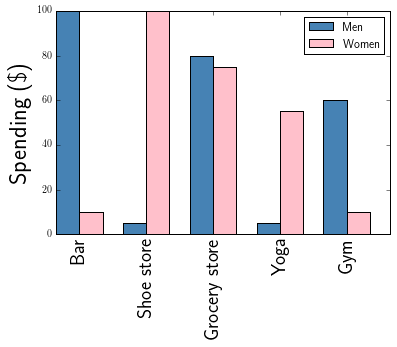

In [38]:
fig = plt.figure( figsize = (6, 4))
ax = plt.subplot(1, 1, 1)

#For a bar chart we need to create a dummy set of x-data.
#It's easiest to just use the `range()` function on the number of groups
num_categories = len(locations)
x_positions = range(num_categories)
offset = 0.35

#Now we can add the men
ax.bar(x_positions, men_spending, offset, label='Men', color='steelblue')
#Then the women
ax.bar([x_pos + offset for x_pos in x_positions], women_spending, offset, label='Women', color='pink')
#Label it
ax.set_ylabel('Spending (\$)', fontsize = 1.6 * font_size)
plt.legend(loc = 'best')
#Axis labels
ax.set_xticks([x_pos + offset for x_pos in x_positions])
ax.set_xticklabels( [label.capitalize() for label in locations], rotation=90, fontsize = 1.3 * font_size)

# Scatter plots

Maybe we want to look at this spending data as a scatter plot though. You'll have one axis be Men's spending and the other axis be women's spending.

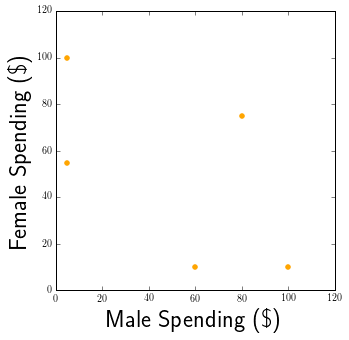

In [39]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)
#We add in the x-data points and then the y-data points
ax.scatter(men_spending, women_spending, color='orange')
#Labels....
ax.set_xlabel('Male Spending (\$)', fontsize = 1.6 * font_size)
ax.set_ylabel('Female Spending (\$)', fontsize = 1.6 * font_size)

Those points are a bit small.... Let's make them bigger

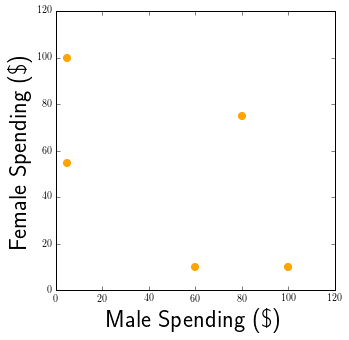

In [40]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)
#We add in the x-data points and then the y-data points
ax.scatter(men_spending, women_spending, s=50, color='orange')
#Labels....
ax.set_xlabel('Male Spending (\$)', fontsize = 1.6 * font_size)
ax.set_ylabel('Female Spending (\$)', fontsize = 1.6 * font_size)

Why doesn't scatter take a `size` attribute and use `s` instead?

Well, in a scatterplot we typically would use the `size` to encode a third variable. This means that `s` will actually take in a list of sizes and apply a size individually to a datapoint.

Let's say that for each one of these categories, I had data that represented how big that market sector was in millions of dollars per year. We could show that with the size.

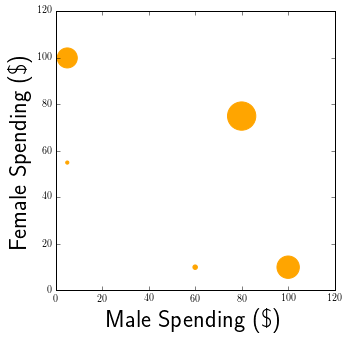

In [48]:
market_size = [500, 400, 800, 10, 20]
#Figure code
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)
#We add in the x-data points and then the y-data points
ax.scatter(men_spending, women_spending, s=market_size, color='orange')
#Labels....
ax.set_xlabel('Male Spending (\$)', fontsize = 1.6 * font_size)
ax.set_ylabel('Female Spending (\$)', fontsize = 1.6 * font_size)

Alternatively, we could show the market size through color instead of the marker size.

To do that we'll need to use a `colormap`. Why is that? Well we want to show, on a continuous scale, how different the market sizes are of these sectors. For us to make a list of colors and map that to an a numerical range would be a lot of work.

Instead matplotlib has a whole host of colormaps that go from a minimum value to a maximum value. There are **three** types of color maps to use:

* **Sequential** - This is when you have a value that is **only** growing or decreasing. This means, *ideally*, that its minimum is logically zero and the range over which you evaluate it is continuous. Think of something like the GDP of countries, some countries have a very low GDP, others have a high GDP, but everyone has a positive GDP and a country can have any GDP value greater than zero.
* **Diverging** - This is when you are plotting something that has **both** positive and negative values. This typically occurs when you are comparing **new** situations to some baseline case. So in biology, it is the up- and down-regulation of genes in a new condition or in economics the change in employment by geography over time (think like retail workers now versus 1980).
* **Qualitative** - This scheme is for when you have **groups** of data that are not continuous. This is like men vs. women or ethnicities. These scales aren't typically represented as continuous, so we just want a set of colors that maximizes the visual difference as much as possible.

These are the color schemes that `matplotlib` has available:

### Sequential
<img src='http://matplotlib.org/_images/colormaps_reference_00.png'></img>
<img src='http://matplotlib.org/_images/colormaps_reference_01.png'></img>

### Diverging
<img src='http://matplotlib.org/_images/colormaps_reference_02.png'></img>

### Qualitative
<img src='http://matplotlib.org/_images/colormaps_reference_03.png'></img>

Not all of these color schemes are good choices though. Don't ever, **ever** use the `jet` colorscheme. I haven't even shown it to you so you can try it, but never use it!

So let's actually add color to our example instead of size. Our market sizes are all positive, continuous values so we should use a sequential color scheme. I like the `Purple Blue` color scheme typically, so let's use that.

We'll need to get our color scheme (which is called a colormap in `matplotlib`) and we'll need to tell the `scatter` function what `colormap` (`cmap` for short) it is that we'll be using. Instead of specifying a color, we'll give it the values to use with the colormap.

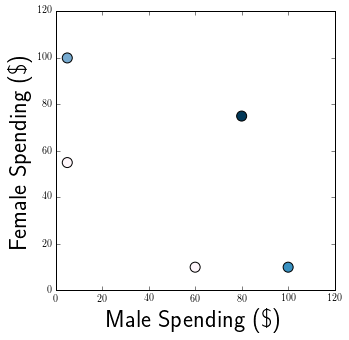

In [49]:
#We get our colormap here
cm = plt.cm.get_cmap('PuBu')
#Figure code
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)
#We add in the x-data points and then the y-data points
ax.scatter(men_spending, women_spending, s=100, c=market_size, cmap=cm)
#Labels....
ax.set_xlabel('Male Spending (\$)', fontsize = 1.6 * font_size)
ax.set_ylabel('Female Spending (\$)', fontsize = 1.6 * font_size)

Great! But when you show a plot liek this your audience needs to know what the color corresponds to. To make that happen we add a `colorbar`.

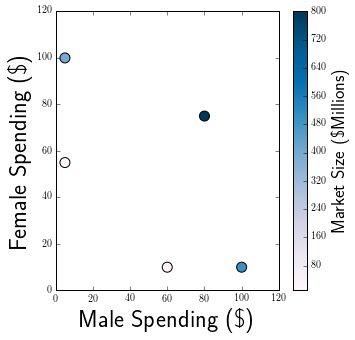

In [52]:
#We get our colormap here
cm = plt.cm.get_cmap('PuBu')
#Figure code
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)
#We add in the x-data points and then the y-data points
#The scatter function returns itself, we put it into a variable and then feed it into the colorbar function
sc = ax.scatter(men_spending, women_spending, s=100, c=market_size, cmap=cm)
#Labels....
ax.set_xlabel('Male Spending (\$)', fontsize = 1.6 * font_size)
ax.set_ylabel('Female Spending (\$)', fontsize = 1.6 * font_size)
#Adding a colorbar
cbar = plt.colorbar(sc)
#You need to add a label to the color bar too
cbar.set_label('Market Size (\$Millions)', fontsize = 1.2 * font_size)

But I would really prefer it if the colorbar could start at `0`. Just like having a bar chart bar start at zero, it's just a good practice. We can add in the value maximum and mininum parameters for the colors in the scatter function.

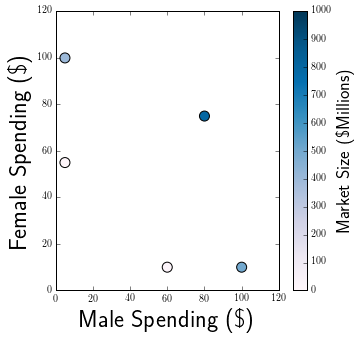

In [54]:
#We get our colormap here
cm = plt.cm.get_cmap('PuBu')
#Figure code
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)
#We add in the x-data points and then the y-data points
#The scatter function returns itself, we put it into a variable and then feed it into the colorbar function
sc = ax.scatter(men_spending, women_spending, s=100, c=market_size, cmap=cm, vmin=0, vmax=1000)
#Labels....
ax.set_xlabel('Male Spending (\$)', fontsize = 1.6 * font_size)
ax.set_ylabel('Female Spending (\$)', fontsize = 1.6 * font_size)
#Adding a colorbar
cbar = plt.colorbar(sc)
#You need to add a label to the color bar too
cbar.set_label('Market Size (\$Millions)', fontsize = 1.2 * font_size)

Great! You've covered a lot of `matplotlib` techniques. There's always more to learn, especially in this library, but this should be more than enough to get started!